# The age of abalone
Abalone is a type of a sea snail. In order to predict its age it is nessesary to cut the shell and count age rings. This is a time-consuming process.
The aim of this project is to examine the link between different physical features of abalone and its age as well as to find an easier way of predicting abalone's age.

### Initial analysis

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the dataset
abalone = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.shape

(4177, 9)

The dataset consists of 9 columns (1 categorical and 8 numeric) and 4177 rows.

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Three columns (Diameter, Whole weight, Shell weight) contain missing values.

In [6]:
#Examine numeric columns
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In most cases means and medians are slightly different. It means that outliers are possible. There's also a strange minimal height of 0. Let's examine it.

In [7]:
# Analyze abnormal heights
abalone[abalone['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two observations with abnormal heights. Let's delete them.

In [8]:
index_height = abalone[ abalone['Height'] == 0].index

abalone.drop(index_height, inplace = True)

In [9]:
# Analyze the only categoric column
abalone.describe(include='object')

,Sex
count,4175
unique,4
top,M
freq,1447


It is strange that a column named "sex" has 4 unique categories. Let's check them.

In [10]:
abalone['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

'f' is included here by mistake. Let's unify 'F' and 'f'.

In [11]:
abalone['Sex']=abalone['Sex'].replace('f', 'F')

In [12]:
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Now there are only three categories here: M - male, F - female, I - infant.

Let's create a function that will perform initial analisys of dataset. It will unify the titles of the columns, count missing values and duplicates, show the type of data and unique values.

In [13]:
def df_info(dataset):
    dataset.columns = dataset.columns.str.lower().str.replace(' ','_')
    for column in dataset.columns:
        print('Column title:             ',column)
        print('Number of missing values: ',dataset[column].isna().sum())
        print('Type of data:             ',dataset[column].dtype)
        print('Unique values:      ')
        print(dataset[column].unique())
        print('----------------')
    print('Number of duplicates: ',dataset.duplicated().sum())

In [14]:
df_info(abalone)

Column title:              sex
Number of missing values:  0
Type of data:              object
Unique values:      
['M' 'F' 'I']
----------------
Column title:              length
Number of missing values:  0
Type of data:              float64
Unique values:      
[0.455 0.35  0.53  0.44  0.33  0.425 0.545 0.475 0.55  0.525 0.43  0.49
 0.535 0.47  0.5   0.355 0.365 0.45  0.38  0.565 0.615 0.56  0.58  0.59
 0.605 0.575 0.68  0.665 0.705 0.465 0.54  0.24  0.205 0.21  0.39  0.46
 0.325 0.52  0.4   0.485 0.405 0.445 0.245 0.505 0.595 0.31  0.555 0.57
 0.6   0.62  0.625 0.695 0.36  0.51  0.435 0.495 0.385 0.515 0.37  0.27
 0.375 0.7   0.71  0.265 0.305 0.345 0.65  0.28  0.175 0.17  0.635 0.645
 0.61  0.725 0.235 0.315 0.225 0.64  0.63  0.585 0.42  0.335 0.415 0.275
 0.295 0.075 0.13  0.11  0.16  0.23  0.3   0.32  0.655 0.66  0.2   0.165
 0.19  0.74  0.34  0.675 0.745 0.685 0.69  0.67  0.29  0.26  0.395 0.41
 0.22  0.255 0.735 0.155 0.48  0.195 0.25  0.18  0.15  0.215 0.73  0.715
 0.765 0.18

The number of missing values is small. It means that we can get rid of them without sacrificing the accuracy of the analysis.

In [15]:
# Delete rows with missing values
abalone = abalone.dropna(subset = ['diameter', 'shell_weight', 'whole_weight'])

In [16]:
abalone.shape

(3933, 9)

242 rows (approximately 6% of data) have been deleted.

Let's add a column with index id. It will make futher calculations more convenient.

In [17]:
abalone = abalone.reset_index()

In [18]:
# Checking columns
abalone.columns

Index(['index', 'sex', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

### Exploratory data analysis

Let's examine the age of abalones by examing the amount of rings.

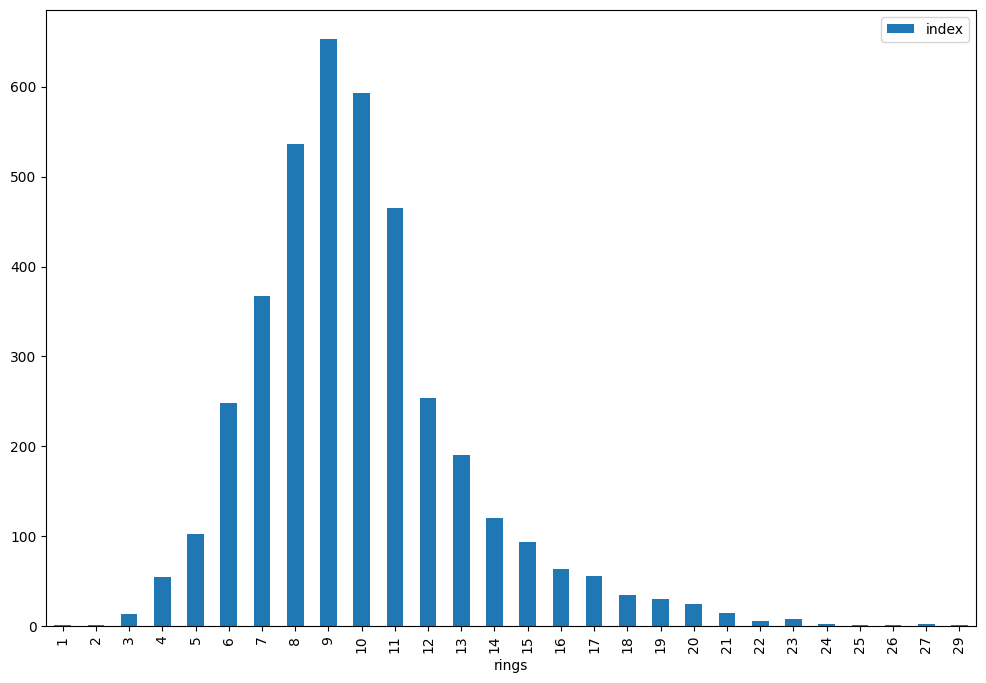

In [19]:
abalone.pivot_table(index='rings', values='index', aggfunc='count').plot(kind='bar', figsize=(12, 8));

The graph above shows us a distribution close to normal. It means that the current dataset can be used for fitting linear models. At the same time there is a long "tail" of rare values: abalones older than 17 rings are rarely found. This "tail" may lead to a considerable mean absolute error.

In [20]:
# Examine shares of different rings
from plotly import graph_objects as go
fig=go.Figure(data=[
    go.Pie(
    labels=abalone['rings'],
    values=abalone['index'])
])
fig.update_layout(title='Shares of different amount of rings')
fig

Approximately 60% of abalones have 8-11 rings. Abalones younger than 5 rings and older than 14 rings are rare in the current dataset.

Let's explore the column "sex" and find out how many rings are to be find in males, females and infants.

In [21]:
abalone[abalone['sex']=='I']['rings'].value_counts()

8     241
7     240
6     198
9     153
10     83
5      83
11     57
4      46
13     22
12     20
14     13
3       9
17      7
15      6
16      5
18      3
20      2
19      2
1       1
21      1
2       1
Name: rings, dtype: int64

Surprisingly, infants may be old enough to have up to 21 rings. Perhaps, it would be more correct to understand this category as unidentified in terms of sex.

In [22]:
abalone[abalone['sex']=='M']['rings'].value_counts()

10    257
9     245
11    206
8     156
12    107
13     84
7      75
14     50
15     42
6      25
16     24
17     22
18     16
19     13
5      11
20     10
21      6
4       6
3       3
22      2
23      2
26      1
27      1
24      1
Name: rings, dtype: int64

The age of males starts with 3 rings old. An average male is only 2 rings older than an average infant. The oldest male has 27 rings.

In [23]:
abalone[abalone['sex']=='F']['rings'].value_counts()

9     255
10    253
11    202
8     139
12    127
13     84
14     57
7      52
15     46
16     34
17     27
6      25
18     16
19     15
20     12
5       8
21      7
23      6
22      3
4       2
29      1
3       1
25      1
27      1
24      1
Name: rings, dtype: int64

The average age of males and females is the same - approximately 9-10 rings. The youngest female has 3 rings. The oldest one has 29.

In [24]:
from plotly import graph_objects as go
fig=go.Figure(data=[
    go.Pie(
    labels=abalone['sex'],
    values=abalone['index'])])
fig.update_layout(title='Shares of infants, males and females')
fig

According to the pie-plot above, there is approximately the same amount of infants, males and females in the dataset.

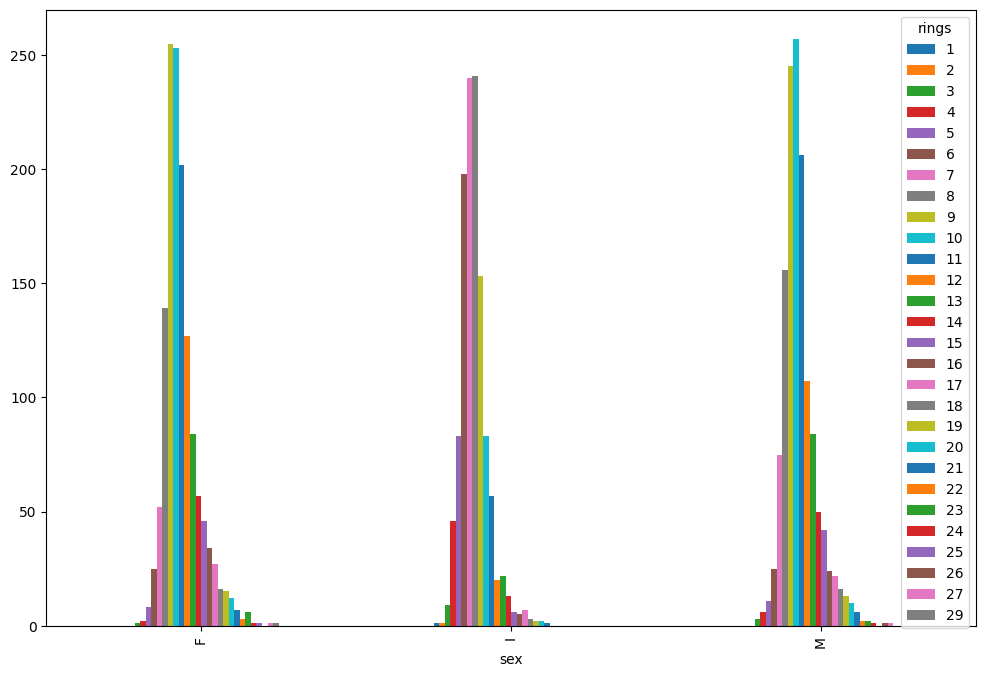

In [25]:
#Analyze share of rings for different sexes
abalone.pivot_table(index='sex', columns='rings', values='index', aggfunc='count').plot(kind='bar', figsize=(12, 8));

Both for males and females the most common age is between 9-11 rings. For infants ages between 6-8 are most common.

In [26]:
# Create scatterplots
infants = abalone[abalone['sex']=='I']
males = abalone[abalone['sex']=='M']
females = abalone[abalone['sex']=='F']

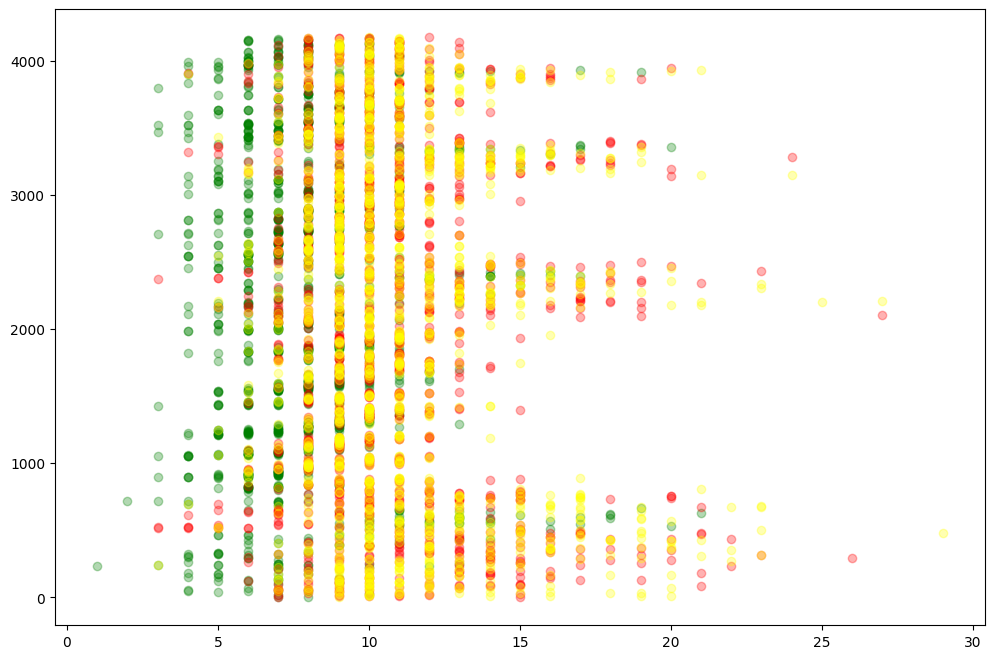

In [27]:
plt.figure(figsize=(12, 8))

# Depict first scattered plot
plt.scatter(x=infants['rings'], y=infants['index'], c='green', alpha=0.3)

# Depict second scattered plot
plt.scatter(x=males['rings'], y=males['index'], c='red', alpha=0.3)

# Depict third scattered plot
plt.scatter(x=females['rings'], y=females['index'], c='yellow', alpha=0.3)

# Depict illustration
plt.show()

Abalones with the number of rings less than 4 and more than 14 are rare. Abalones with 4-6 rings are usually infants. Abalones older than 8 are usually males or females.

In previous chapter (initial analysis) we have found out that means and medians of numeric columns are different which may be because of outliers. Let's check it.

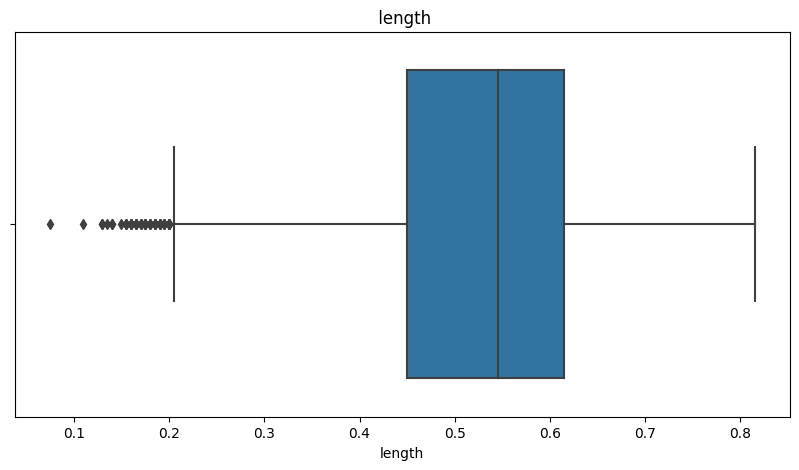

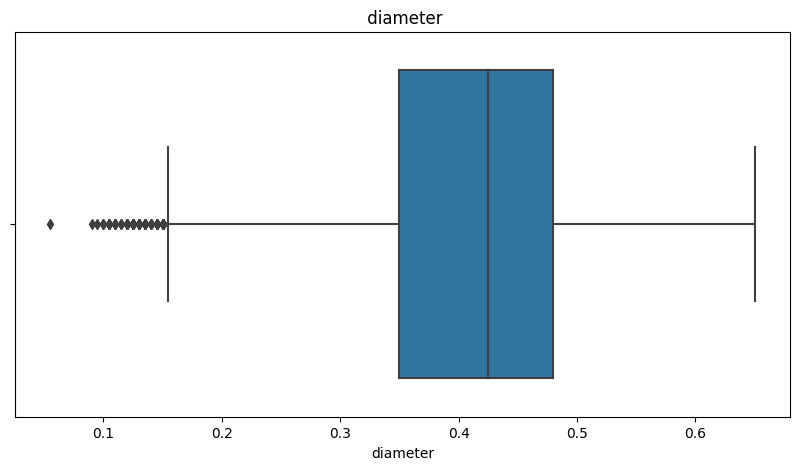

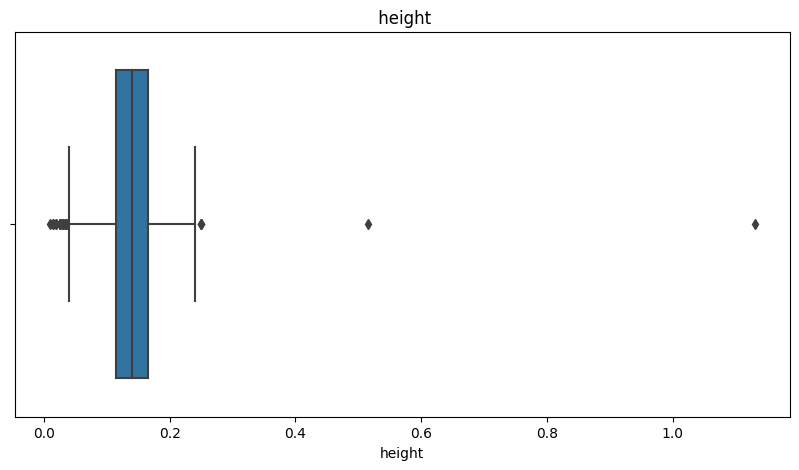

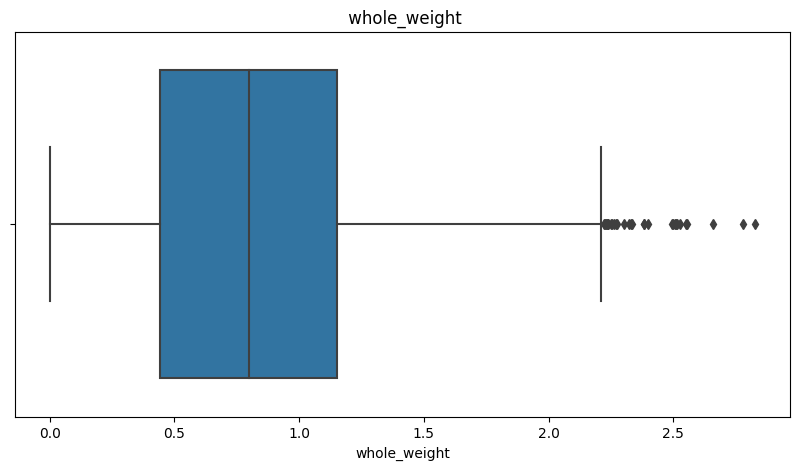

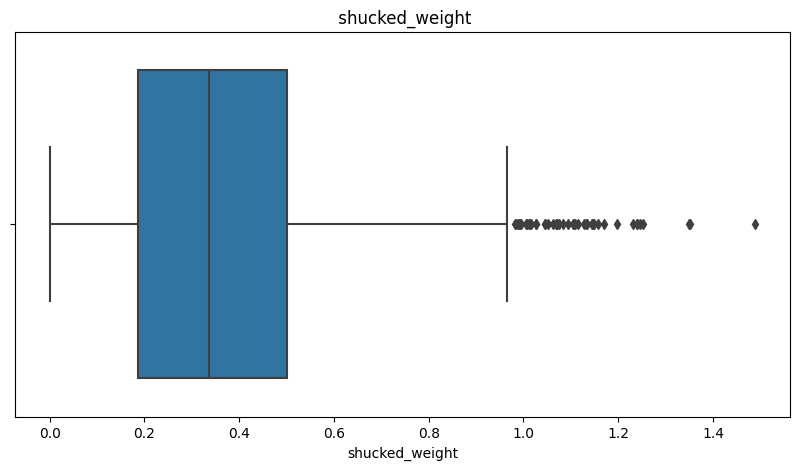

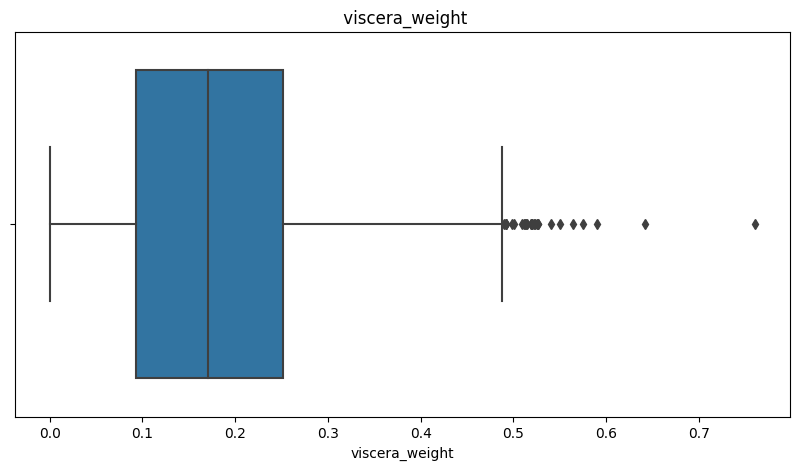

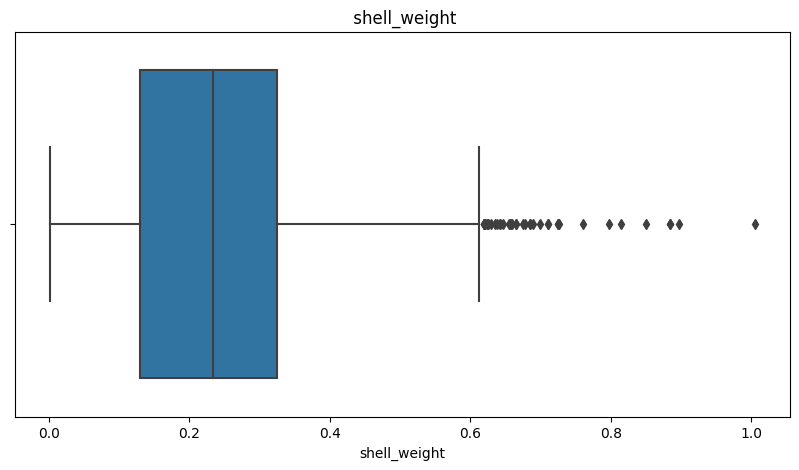

In [28]:
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = abalone[ col]);
    plt.title(' ' + col)
    plt.show()

Before removing outliers we need to confirm that this data is distributed normally.

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



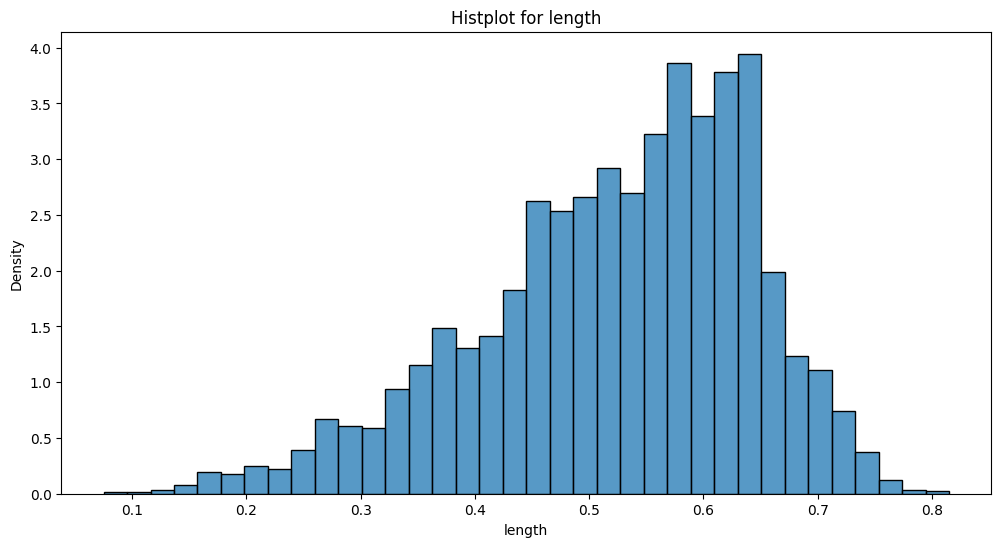

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



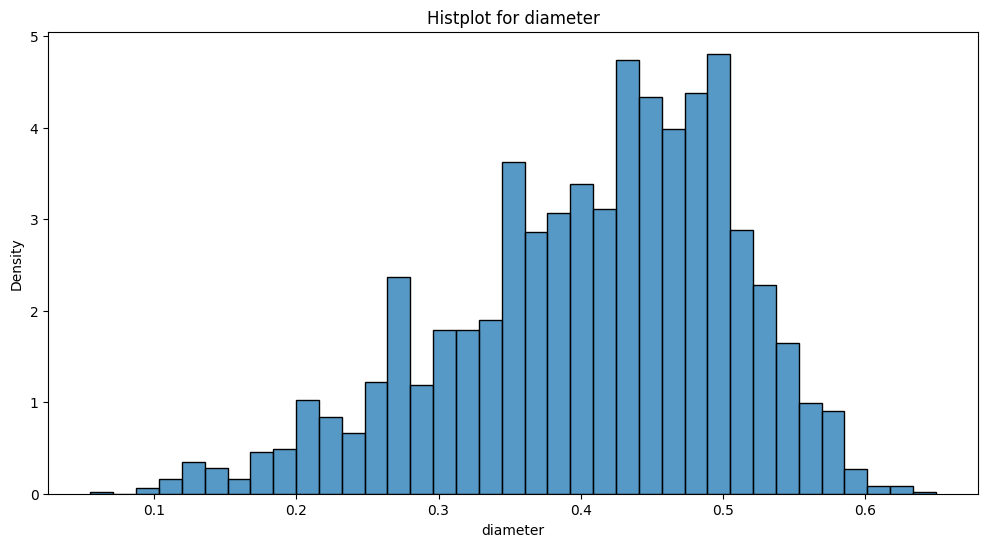

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



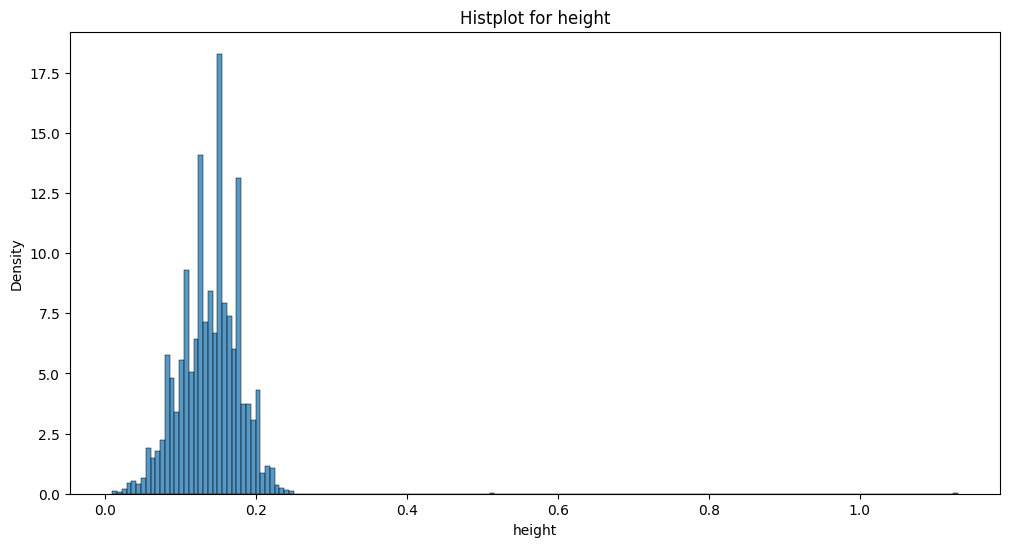

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



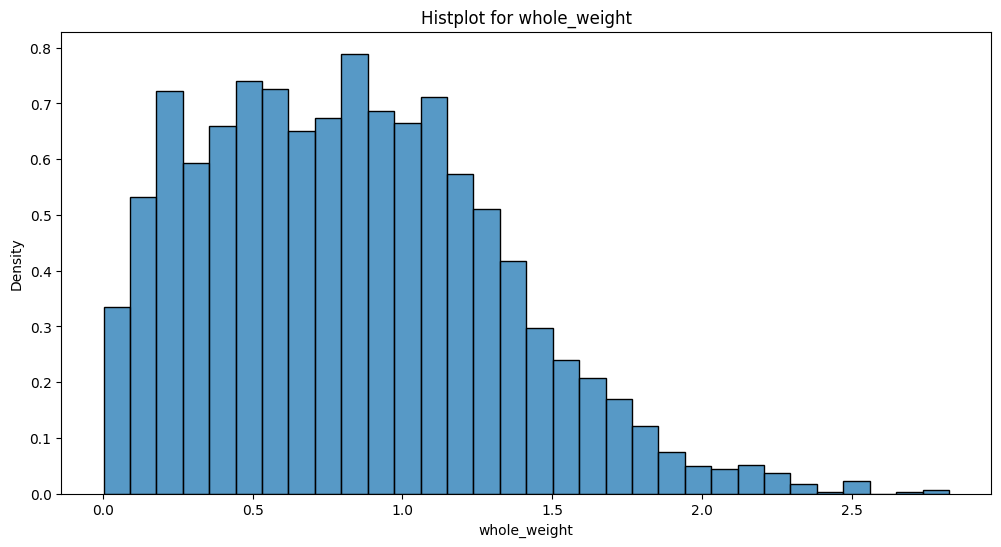

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



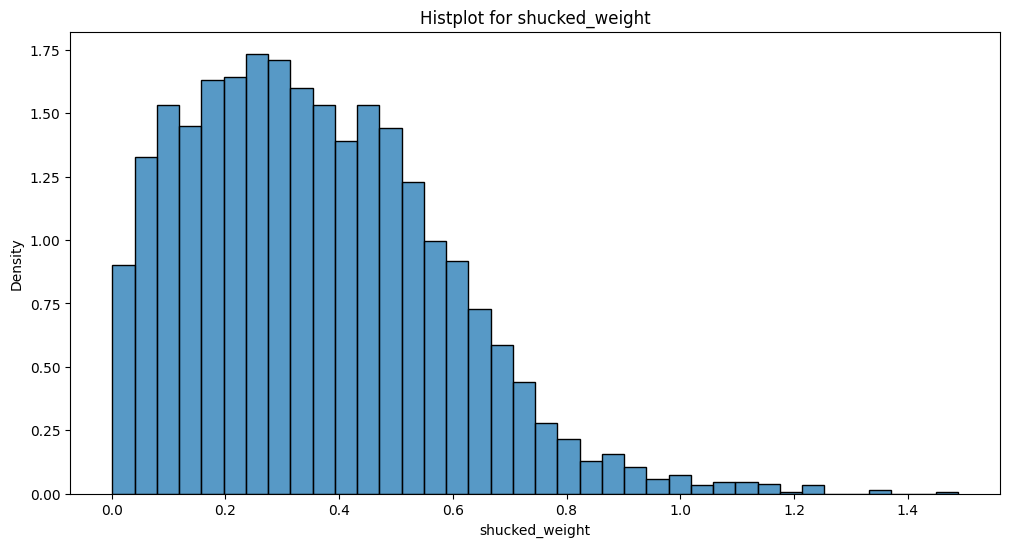

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



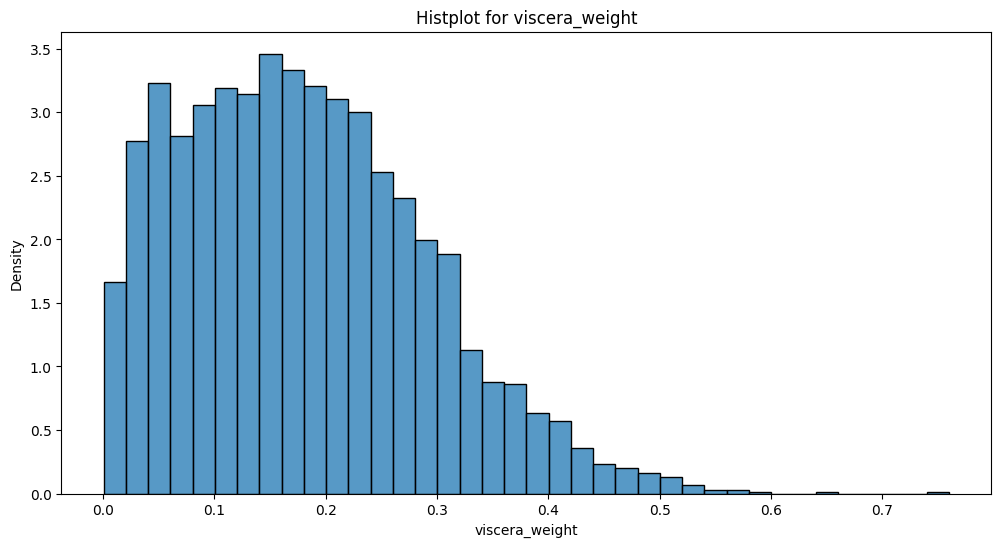

<ipython-input-29-281d970ba8f3>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



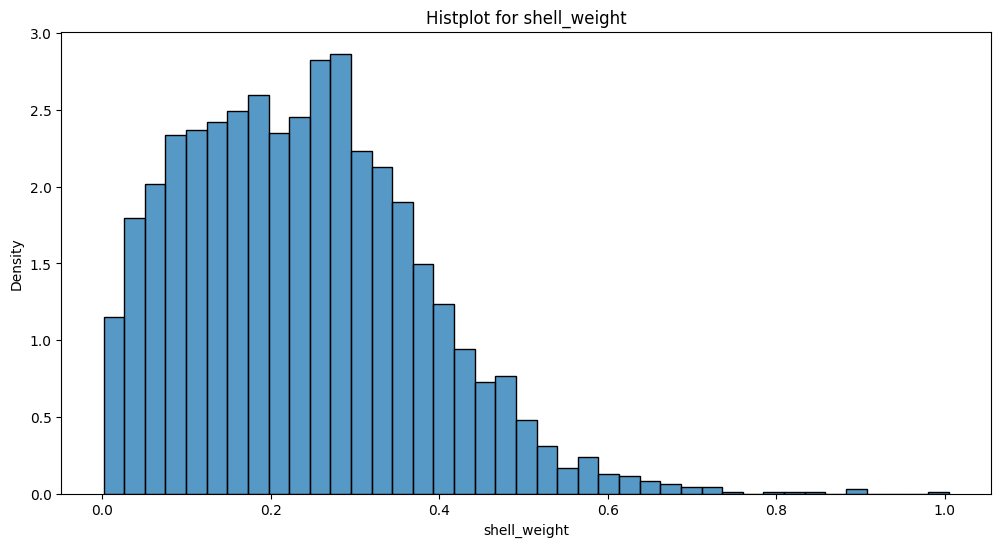

In [29]:
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data = abalone, x = col, stat="density", common_norm = False, palette = "tab10")
    plt.title('Histplot for ' + col)
    plt.show()

In [30]:
# Remove outliers
abalone = abalone[abalone['length']>0.2]
abalone = abalone[abalone['diameter']>0.15]
abalone = abalone[abalone['height']<0.25]
abalone = abalone[abalone['whole_weight']<2.2]
abalone = abalone[abalone['shucked_weight']<1]
abalone = abalone[abalone['viscera_weight']<0.5]
abalone = abalone[abalone['shell_weight']<0.6]
abalone.shape

(3788, 10)

Outliers have been removed. The dataset has decreased by 3.7% (145 rows).

Let's examine the link between rings and other numeric columns.

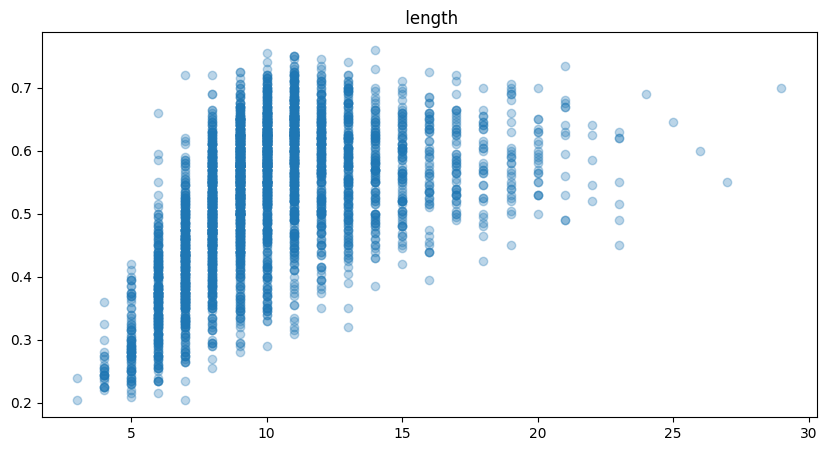

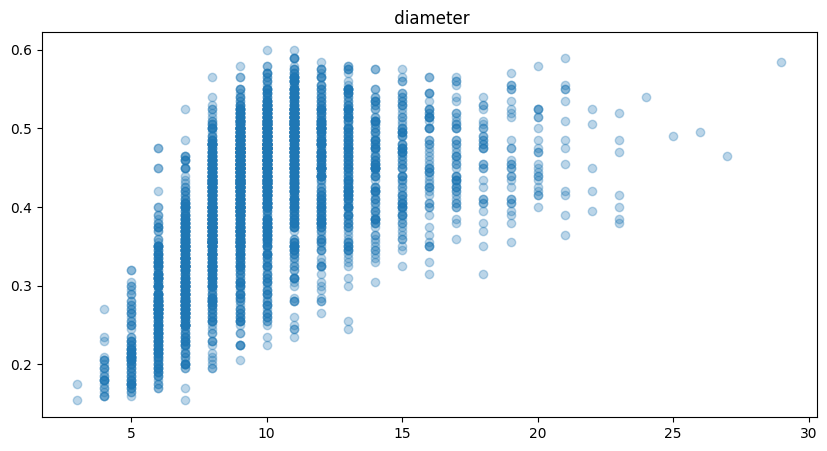

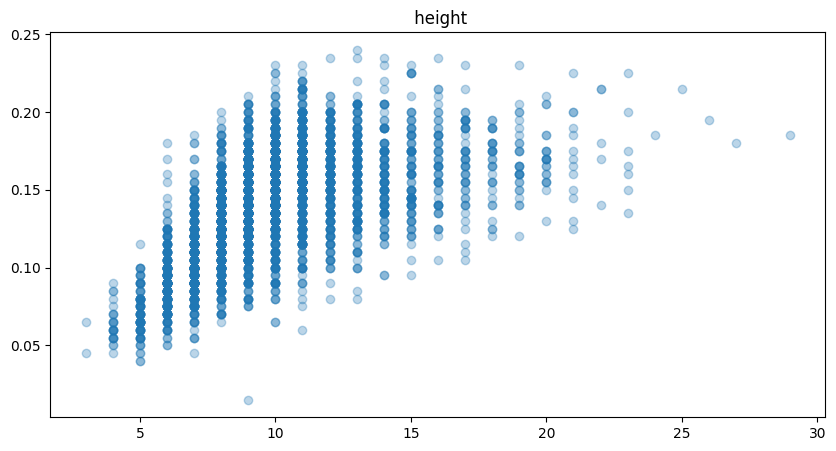

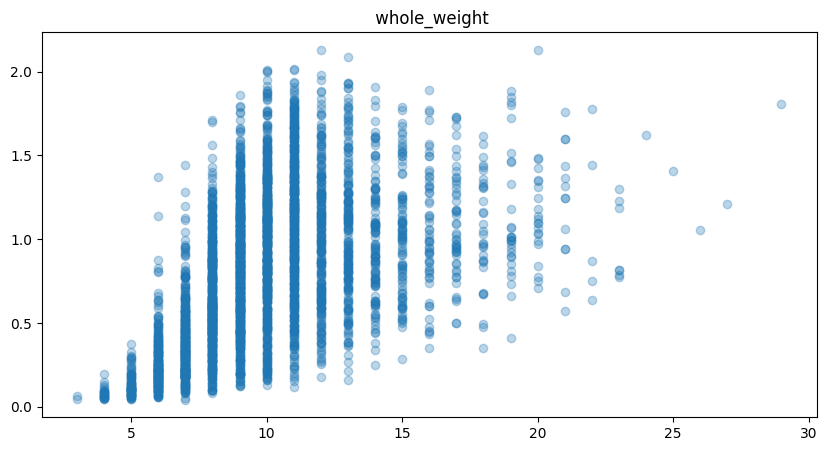

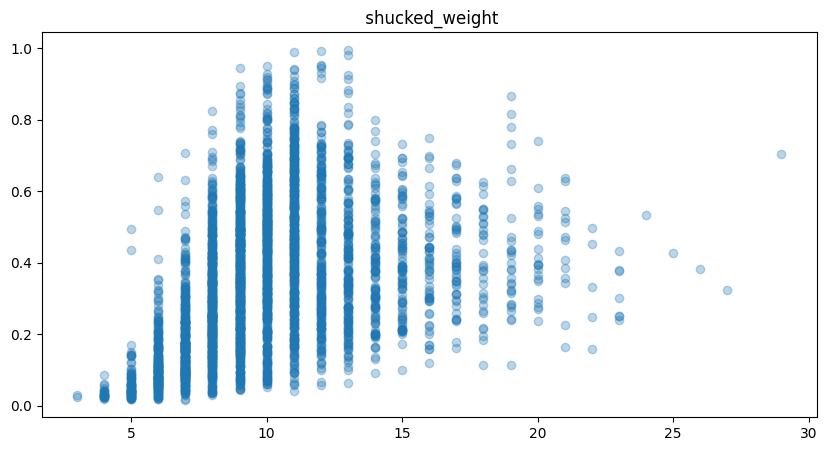

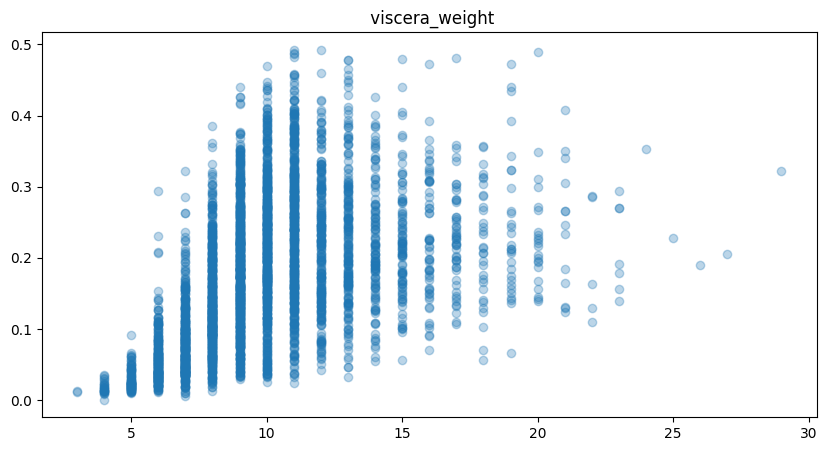

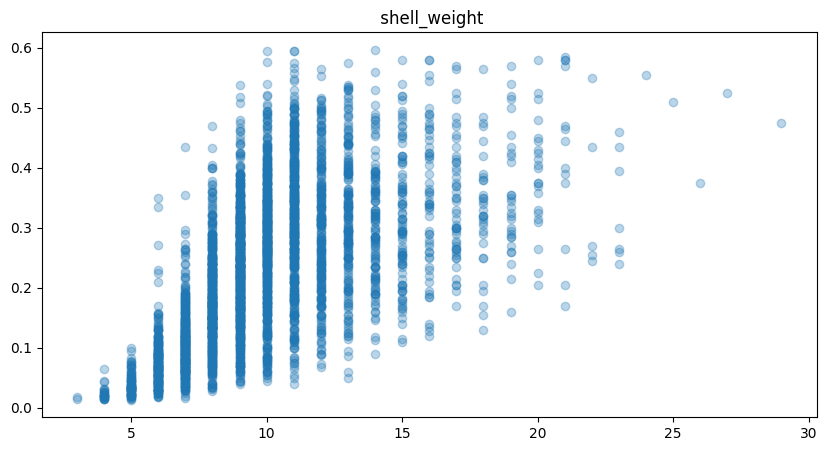

In [31]:
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
for col in columns:
    plt.figure(figsize=(10, 5))
    plt.scatter(x=abalone['rings'], y=abalone[col], alpha=0.3)
    plt.title(' ' + col)
    plt.show()

Judging by the graphs above, the older an abalone is, the bigger its physical features become.

### Correlation

Before calcuilating correlations we need to change categorical data in the column 'sex'.

In [32]:
abalone=pd.get_dummies(abalone, columns = ['sex'], drop_first = True)

In [33]:
abalone.rename(columns={"sex_I": "infant", "sex_M": "male"}, inplace = True)

Let's examine different types of correlation between the features. We'll start with Pearson's correlation that shows the strength of linear correlation between two variables.

In [34]:
pearson = abalone.drop(['index'], axis=1).corr()
pearson.style.background_gradient(cmap='coolwarm')

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,infant,male
length,1.000000,0.985542,0.888179,0.939966,0.912990,0.911190,0.916445,0.511775,-0.523662,0.211600
diameter,0.985542,1.000000,0.894818,0.938861,0.906460,0.906644,0.923549,0.531080,-0.537440,0.218847
height,0.888179,0.894818,1.000000,0.889415,0.835340,0.866087,0.896407,0.572971,-0.532099,0.211639
whole_weight,0.939966,0.938861,0.889415,1.000000,0.968418,0.964695,0.957637,0.508628,-0.543979,0.230090
shucked_weight,0.912990,0.906460,0.835340,0.968418,1.000000,0.927276,0.886555,0.384349,-0.507964,0.228857
viscera_weight,0.911190,0.906644,0.866087,0.964695,0.927276,1.000000,0.911654,0.472692,-0.538618,0.219192
shell_weight,0.916445,0.923549,0.896407,0.957637,0.886555,0.911654,1.000000,0.598562,-0.536730,0.218950
rings,0.511775,0.531080,0.572971,0.508628,0.384349,0.472692,0.598562,1.000000,-0.405544,0.162457
infant,-0.523662,-0.537440,-0.532099,-0.543979,-0.507964,-0.538618,-0.536730,-0.405544,1.000000,-0.480001
male,0.211600,0.218847,0.211639,0.230090,0.228857,0.219192,0.218950,0.162457,-0.480001,1.000000


Pearson's correlation shows that there is moderate linear dependency between the age (rings) of an abalone and its physical features. The strongest correlation is with shell_weight and height.

Let's calculate Spearman's correlation. It can evalute also non-linear dependencies.

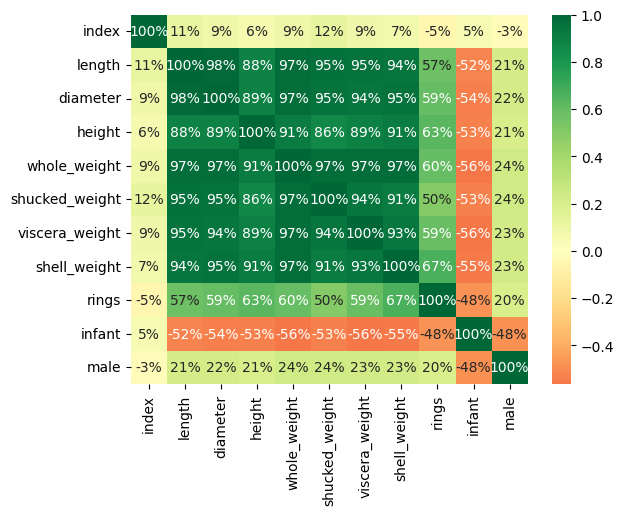

In [35]:
spearman = abalone.corr(method='spearman')

sns.heatmap(spearman, annot=True, fmt = ".0%", cmap = "RdYlGn", center = 0);

The results are similar to those of Pearson correlation: the strongest dependency is with shell_weight and height.

Let's count Kendall correlation. It is also suitable for analyzing non-linear dependencies.

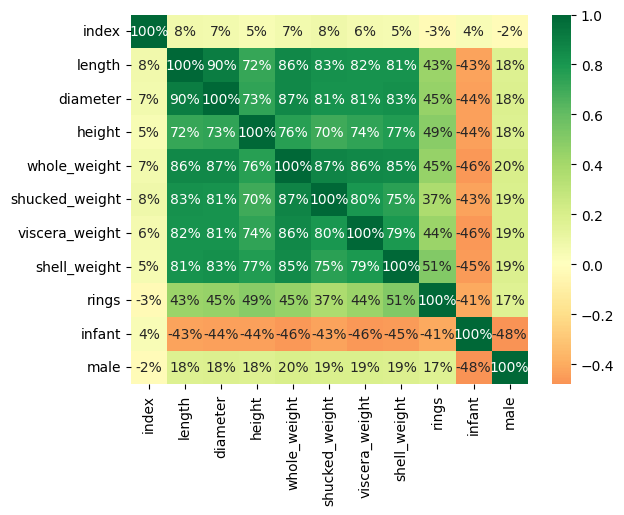

In [36]:
kendall = abalone.corr(method='kendall')

sns.heatmap(kendall, annot=True, fmt = ".0%", cmap = "RdYlGn", center = 0);

Kendall's correclation repeats the results of Pearson's and Spearman's correlations.

Let's use ANOVA method to find out if there's a correlation between the column 'sex' and numeric columns.

In [37]:
from scipy.stats import f_oneway
Data = []

for c1 in abalone.columns:
    for c2 in abalone.columns:
        if abalone[c1].dtype == 'object' and abalone[c2].dtype != 'object':
            CategoryGroupLists = abalone.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

""


There is a correlation between the sex of an abalone and its age (rings).

### Polars

In [38]:
a_big = abalone.copy()

for i in range(300):
  a_big = pd.concat([a_big, abalone])

a_big.to_csv("abalone_big.csv", index=False)

In [39]:
a_big.shape

(1140188, 11)

In [40]:
!pip install polars

import polars as pl

print(pl.__version__)

0.17.3


#### Download by means of Pandas and Polars

In [41]:
%%time

a_big_pandas = pd.read_csv("abalone_big.csv")

CPU times: user 1.14 s, sys: 92 ms, total: 1.23 s
Wall time: 1.35 s


In [42]:
%%time

a_big_polars = pl.read_csv("abalone_big.csv")

CPU times: user 948 ms, sys: 238 ms, total: 1.19 s
Wall time: 879 ms


Polars downloads a dataset two times faster than Pandas.

#### Filtration by means of Pandas and Polars

In [43]:
%%time

a_big_pandas[(a_big_pandas['sex']=='I')&(a_big_pandas['rings']>7)]

KeyError: ignored

In [44]:
%%time

a_big_polars.filter((pl.col('sex')=='I')&(pl.col('rings')>7))

ColumnNotFoundError: ignored

When filtering Polars is more than 3 times faster then Pandas.

#### Aggreggation by means of Pandas and Polars

In [45]:
%%time

a_big_pandas.groupby('rings').agg({'height' : 'max', 'shell_weight' : 'median'})

CPU times: user 62.8 ms, sys: 13 µs, total: 62.8 ms
Wall time: 86.2 ms


,height,shell_weight
rings,,
3,0.065,0.01550
4,0.090,0.02125
5,0.115,0.03500
6,0.180,0.07000
7,0.185,0.10450
8,0.200,0.17000
9,0.210,0.23500
10,0.230,0.28000
11,0.230,0.31500


In [46]:
%%time

a_big_polars.groupby('rings').agg([pl.max('height'), pl.median('shell_weight')])

CPU times: user 53.9 ms, sys: 1.19 ms, total: 55.1 ms
Wall time: 79.8 ms


rings,height,shell_weight
i64,f64,f64
12,0.235,0.305
8,0.2,0.17
14,0.235,0.3
22,0.215,0.27
26,0.195,0.375
16,0.235,0.34
6,0.18,0.07
24,0.185,0.555
10,0.23,0.28


When aggregating Pandas shows 25% faster velocity than Polars.

### Machine learning

#### Naive Bayes classifier

We will use Naive Bayes classifier to try to predict whether an abalone is young (it has 9 rings or less) or old (has more than 9 rings).

In [47]:
# Split dataset in a matrix of objects of numeric features and the target variable
X = abalone[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]
y = abalone['rings']

In [48]:
# Check that there is approximately the same amount of "young" and "old" abalones in the dataset.
y_class = (y > 9).astype(int)
y_class.value_counts()

0    1914
1    1874
Name: rings, dtype: int64

In [49]:
# Split data in train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

In [50]:
# Announce and fit a model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [51]:
# Check the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7275607180570222

In [52]:
#Check the confusion matrix of the model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[328, 142],
       [116, 361]])

The quality of the current model is not high - just 0.72.

#### k-nearest neighbors classifier

In [53]:
# Announce and fit a knn-model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [54]:
# Check the accuracy of the model
accuracy_score(y_test, y_pred_knn)

0.7497360084477297

In [55]:
confusion_matrix(y_test, y_pred_knn)

array([[358, 112],
       [125, 352]])

The quality of the knn-model is a bit higher - 0.76.

#### Linear regression

In [56]:
# Announce and fit a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [57]:
# Check the MAE of the model
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_lr), np.mean(y_test)

(1.6325136242637446, 10.00844772967265)

The quality of the current linear model is quite high.

### Hyperparameters

In [58]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : np.arange(2, 30, 1),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(knn, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [59]:
gs.best_score_, gs.best_params_

(0.2653995072157691, {'n_neighbors': 29, 'p': 1, 'weights': 'distance'})

In [60]:
y_pred_knn_imp = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred_knn_imp)

0.25237592397043296

We managed to improve the accuracy of the knn model.

In [61]:
params2 = {'fit_intercept' : [True],
          'copy_X' : [True],
          'n_jobs' : [2]}

gs2 = GridSearchCV(lr, params2, cv=3, n_jobs=-1, verbose=2)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [2]},
             verbose=2)

In [62]:
y_pred_lr_imp = gs2.best_estimator_.predict(X_test)

mean_absolute_error(y_test, y_pred_lr_imp), np.mean(y_test)


(1.6325136242637446, 10.00844772967265)

The linear regression model hasn't been improved.

### Machine learning including categorical columns

In [63]:
# Include all columns into the dataset (both numeric and categorical)
X_full = abalone.drop('rings', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_class, test_size=0.25, random_state=42)

I have already performed one hot encoding so that categorical columns would be analyzed during correlation, etc.

In [64]:
# Scale numerical input variables to a standard range
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()
X_train_transformed = scaled.fit_transform(X_train_full)
X_test_transformed = scaled.transform(X_test_full)


In [65]:
X_train2 = pd.DataFrame(scaled.fit_transform(X_train_full), columns=X_train_full.columns)
X_test2 = pd.DataFrame(scaled.transform(X_test_full), columns=X_test_full.columns)

Let's fit another knn model now using all the columns.

In [66]:
knn2 = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30, 1),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knn2 = GridSearchCV(knn2, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=5)
gs_knn2.fit(X_train2, y_train_full)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [67]:
gs_knn2.best_score_, gs.best_params_

(0.7940865892291447, {'n_neighbors': 29, 'p': 1, 'weights': 'distance'})

In [68]:
pred = gs_knn2.best_estimator_.predict(X_test_full)

accuracy_score(y_test_full, pred)

0.6050686378035903

In [69]:
confusion_matrix(y_test_full, pred)

array([[450,  20],
       [354, 123]])

The accuracy of knn-model has become bigger after adding categorical features.

Let's include categorical features and fit one more linear regression.

In [70]:
X_train_full, X_test_full, y_train_full2, y_test_full2 = train_test_split(X_full, y, test_size=0.25, random_state=42)

lr2 = LinearRegression()

lr.fit(X_train2, y_train_full2)

y_pred_lr2 = lr.predict(X_test2)

In [71]:
mean_absolute_error(y_test_full2, y_pred_lr2), np.mean(y_test_full2)

(1.5988277491353877, 10.00844772967265)

The quality of a linear model has slightly improved after adding categorical columns.

### Explainer Dashboard

In [73]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00


In [74]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
explainer = ClassifierExplainer(gs_knn2.best_estimator_, X_test2[:100], y_test_full.iloc[:100])

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [77]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


  0%|          | 0/100 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [78]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

1. Which criteria in average are important for predicting the age of an abalone? According to both permutation method and SHAP method when predicting whether an abalone is young or old the most important factor is whether this abalone is an infant. The next biggest impact is produced by abalone's shell weight and height.
2. Accuracy is 0.8, which means that the model is quite good at predicting abalones' age.
3. Individual predictions:
- abalone #55 is probably aged (73%). Its height and viscera weight are significant factors indicating that this abalone is most surely aged.
- abalone #39 is 100% young. The biggest impact is done by the following factors: its shell weight, the fact that it is an infant, its whole weight and height.
- abalone #33 is considered to be old (91%) mainly due to its shell_weight, whole_weight, height.

# The results of the research

We have examined a dataset devoted to abalones: processed missing values, found out that all features are normaly distributed, get rid of outliers.

According to the dataset we have, 60% of abalones have 8-11 rings. Rings less than 5 and more than 14 are rare. All the abalones in the dataset are almost equally divided into 3 categories: males, females, infants. As some infants have as many rings as 21, perhaps, it would be more accurate to understand this category of abalones as unidentified in terms of sex.

According to scatter plots we have built, the older an abalone is, the greater physical features it has.

We have also confirmed the presence of moderate correlation between the age of an abalone and its shell weight and height.

We have fit 2 classification models (Naive Bayes classifier and k-nearest neighbour classifier) and one linear regression. We have found out that including all categorical and numeric columns into analysis makes outcome slightly better.

The best classification model is a knn model with 29 neighbours. It has accuracy of 0.61. The best linear regression has been built using all columns and has MAE of 1.6 (the mean is 10). ML-models predict that such factors as whether an abalone is an infant and abalone's shell weight have the most considerable impact in predicting abalone's age.
